In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev

In [2]:
def spike_array(l,N):
  spikes = np.random.poisson(lam = l, size = (N,1))
  return(spikes)

# Question 2

###2. a. Spike Counts

Text(0.5, 1.0, 'Neuron 1 Stimulus 2 - 100 trials')

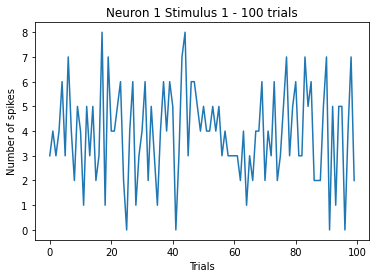

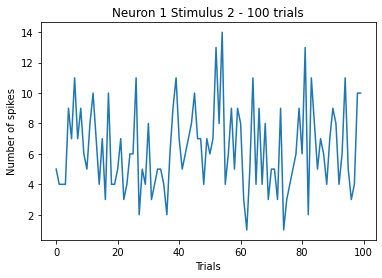

In [3]:
spikes_1_1 = spike_array(4,100)
plt.figure()
plt.plot(spikes_1_1)
plt.xlabel('Trials')
plt.ylabel('Number of spikes')
plt.title('Neuron 1 Stimulus 1 - 100 trials')
spikes_1_2 = spike_array(6,100)
plt.figure()
plt.plot(spikes_1_2)
plt.xlabel('Trials')
plt.ylabel('Number of spikes')
plt.title('Neuron 1 Stimulus 2 - 100 trials')

###2. b. Conditional histogram

Text(0.5, 1.0, 'Neuron 2 - response to stimulus 2')

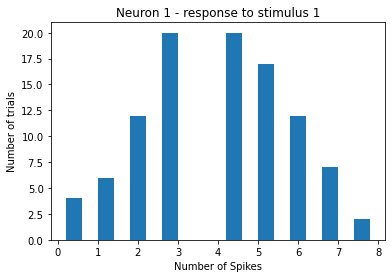

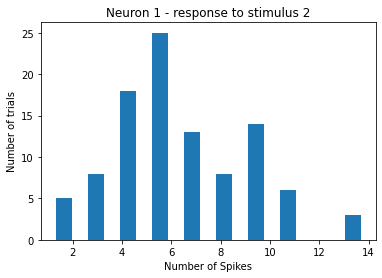

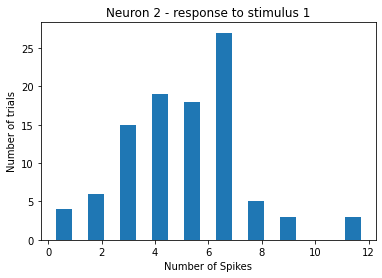

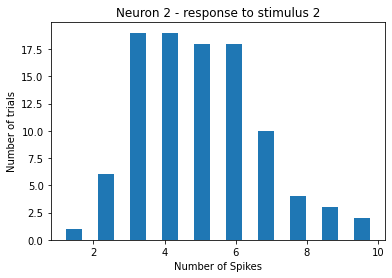

In [4]:
plt.hist(spikes_1_1,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 1 - response to stimulus 1')
plt.figure()
plt.hist(spikes_1_2,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 1 - response to stimulus 2')
plt.figure()
spikes_2_1 = spike_array(5,100)
plt.hist(spikes_2_1,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 2 - response to stimulus 1')
plt.figure()
spikes_2_2 = spike_array(5,100)
plt.hist(spikes_2_2,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 2 - response to stimulus 2')

###2.c. Marginal Histogram

Text(0.5, 1.0, 'Neuron 2 - without conditioning to stimulus')

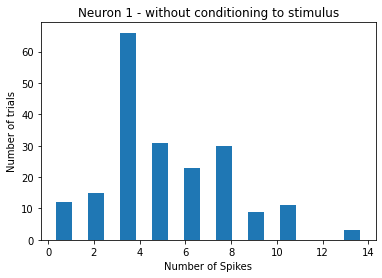

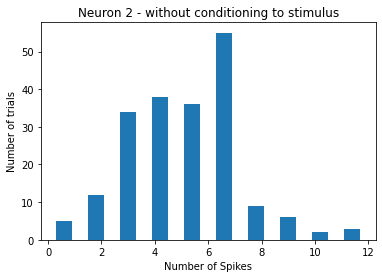

In [5]:
spikes_1_marg = np.append(spikes_1_1,spikes_1_2)
plt.hist(spikes_1_marg,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 1 - without conditioning to stimulus')
spikes_2_marg = np.append(spikes_2_1,spikes_2_2)
plt.figure()
plt.hist(spikes_2_marg,rwidth=0.5)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of trials')
plt.title('Neuron 2 - without conditioning to stimulus')

In [6]:
def make_prob(dist):
  factor = sum(dist)
  dist_new = [j/factor for j in dist]
  return dist_new

In [7]:
def make_bins(dist):
  arr = np.zeros(20)
  for i in range(20):
    arr[i] = len([j for j in dist if j==i])
  return arr

In [8]:
spikes_1_1 = make_bins(spikes_1_1)
spikes_1_2 = make_bins(spikes_1_2)
spikes_2_1 = make_bins(spikes_2_1)
spikes_2_2 = make_bins(spikes_2_2)
spikes_1_marg = make_bins(spikes_1_marg)
spikes_2_marg = make_bins(spikes_2_marg)

In [9]:
prob_spikes_1_marg = make_prob(spikes_1_marg)
prob_spikes_2_marg = make_prob(spikes_2_marg)
prob_spikes_1_1 = make_prob(spikes_1_1)
prob_spikes_1_2 = make_prob(spikes_1_2)
prob_spikes_2_1 = make_prob(spikes_2_1)
prob_spikes_2_2 = make_prob(spikes_2_2)

In [10]:
def ent_r(r_dist):
  sum = 0
  for i in range(len(r_dist)):
    if r_dist[i]!=0:
      sum -= r_dist[i]*np.log2(r_dist[i])
  return(sum)

In [11]:
def ent_r_cond(r_dist):
  sum = 0
  for j in range(len(r_dist)):
    isum = 0
    for i in range(len(r_dist[j])):
      if r_dist[j][i]!=0:
        isum-= r_dist[j][i]*np.log2(r_dist[j][i])
    sum += 0.5*isum
  
  return(sum)

###3. a. Entropy without conditioning on stimulus

In [12]:
neur_1_ent = ent_r(prob_spikes_1_marg)
neur_2_ent = ent_r(prob_spikes_2_marg)
print("Entropy without conditioning for stimulus, neuron 1 - ")
print(neur_1_ent)
print("---------")
print("Entropy without conditioning for stimulus, neuron 2 - ")
print(neur_2_ent)

Entropy without conditioning for stimulus, neuron 1 - 
3.3460605087133906
---------
Entropy without conditioning for stimulus, neuron 2 - 
3.0361650789033168


###3.b. Entropy conditioned on stimulus

In [13]:
total_spikes_1 = []
total_spikes_1.append(prob_spikes_1_1)
total_spikes_1.append(prob_spikes_1_2) 
neur_1_ent_cond = ent_r_cond(total_spikes_1)
total_spikes_2 = []
total_spikes_2.append(prob_spikes_2_1)
total_spikes_2.append(prob_spikes_2_2) 
neur_2_ent_cond = ent_r_cond(total_spikes_2)
print("Entropy conditioning for stimulus, neuron 1 - ")
print(neur_1_ent_cond)
print("---------")
print("Entropy conditioning for stimulus, neuron 2 - ")
print(neur_2_ent_cond)

Entropy conditioning for stimulus, neuron 1 - 
3.1414108765631807
---------
Entropy conditioning for stimulus, neuron 2 - 
2.9972403321767316


###3.c. Mutual Information - 

In [14]:
def inf(hr,hrs):
  return(hr-hrs)

In [15]:
print("Mutual information for neuron 1")
print(inf(neur_1_ent,neur_1_ent_cond))

Mutual information for neuron 1
0.20464963215020981


In [16]:
print("Mutual information for neuron 2")
print(inf(neur_2_ent,neur_2_ent_cond))

Mutual information for neuron 2
0.03892474672658519


We see that the mutual information for neuron 1 is larger than that of neuron 2. This makes sense when we look at the response to the stimuli by both the neurons. Neuron 1 gives different response to the different stimuli wheras neuron 2 gives the same information to both stimuli. This means that the neuron 1 is more informative, that is, it gives us more information about the stimuli. Because neuron 2 gives the same response both times, we can say that it is not informative. Thus, it is expected that we would see higher information for neuron 1 over neuron 2

###3.d. Analytical solution for Neuron 2

For neuron 2, we know that the response of the neuron does not depend on the stimulus. That is it always shows the same response to both the stimuli.
$$\implies H[R] - H[R|S] = 0$$

Thus, the mutual information for neuron 2 should be 0. This is however not the case when we find the results analytically. This is the result of the undersampling bias as discussed in the next question.

###3.e. 10 simulation results

In [17]:
inf_1 = []
inf_2 = []
for i in range(10):
  spikes_1_1 = spike_array(4,100)
  spikes_1_2 = spike_array(6,100)
  spikes_2_1 = spike_array(5,100)
  spikes_2_2 = spike_array(5,100)
  spikes_1_marg = np.append(spikes_1_1,spikes_1_2)
  spikes_2_marg = np.append(spikes_2_1,spikes_2_2)
  spikes_1_1 = make_bins(spikes_1_1)
  spikes_1_2 = make_bins(spikes_1_2)
  spikes_2_1 = make_bins(spikes_2_1)
  spikes_2_2 = make_bins(spikes_2_2)
  spikes_1_marg = make_bins(spikes_1_marg)
  spikes_2_marg = make_bins(spikes_2_marg)
  prob_spikes_1_marg = make_prob(spikes_1_marg)
  prob_spikes_2_marg = make_prob(spikes_2_marg)
  prob_spikes_1_1 = make_prob(spikes_1_1)
  prob_spikes_1_2 = make_prob(spikes_1_2)
  prob_spikes_2_1 = make_prob(spikes_2_1)
  prob_spikes_2_2 = make_prob(spikes_2_2)

  neur_1_ent = ent_r(prob_spikes_1_marg)
  neur_2_ent = ent_r(prob_spikes_2_marg)

  total_spikes_1 = []
  total_spikes_1.append(prob_spikes_1_1)
  total_spikes_1.append(prob_spikes_1_2) 
  neur_1_ent_cond = ent_r_cond(total_spikes_1)
  total_spikes_2 = []
  total_spikes_2.append(prob_spikes_2_1)
  total_spikes_2.append(prob_spikes_2_2) 
  neur_2_ent_cond = ent_r_cond(total_spikes_2)
  inf_1.append(inf(neur_1_ent,neur_1_ent_cond))
  inf_2.append(inf(neur_2_ent,neur_2_ent_cond))
print("Mutual information for neuron 1 averaging over 10 tries reported as (mean +- stddev)")
print(str(mean(inf_1)) + " +- " + str(stdev(inf_1)))
print("-------")
print("Mutual information for neuron 2 averaging over 10 tries reported as (mean +- stddev)")
print(str(mean(inf_2)) + " +- " + str(stdev(inf_2)))

Mutual information for neuron 1 averaging over 10 tries reported as (mean +- stddev)
0.1751520756275892 +- 0.04607550602241119
-------
Mutual information for neuron 2 averaging over 10 tries reported as (mean +- stddev)
0.05246896348396324 +- 0.009961547361116043
